In [1]:
from data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN

ModuleNotFoundError: No module named 'tslearn'

# Parameters

In [ ]:
dataset='GunPoint'

# Load Data

In [ ]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='tf',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [ ]:
print(train_x.shape)
print(test_x.shape)

(50, 150, 1)
(150, 150, 1)


In [ ]:
train_x.shape

(50, 150, 1)

In [ ]:
train_y.shape

(50,)

# Load Model

In [ ]:
model= pickle.load(open(f'ClassificationModels/models/GunPoint/GunPoint_SVM.sav','rb')).fit(train_x,train_y)
#/media/jacqueline/Data/InterpretabiltyTimeSeries/ClassificationModels/models/GunPoint/GunPoint_SVM.sav

# Explanation Algo

In [ ]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [ ]:
from InterpretabilityModels.leftist.LEFTIST import LEFTIST
from InterpretabilityModels.leftist.timeseries.segmentator.uniform_segmentator import UniformSegmentator

In [ ]:
model_to_explain = model
random_state=0


In [ ]:
print(explained_instance.shape)

(150, 1)


In [ ]:
segmentator = UniformSegmentator(nb_interpretable_feature)
leftist = LEFTIST(test_x,'straight_line',segmentator,model_to_explain,learning_process_name,mode='sklearn')

In [ ]:
type(explained_instance)

numpy.ndarray

In [ ]:
type(test_x)

numpy.ndarray

In [ ]:
explanations = leftist.explain(np.array(explained_instance),1000,explanation_size=explanation_size)
#for i in range(len(explanations)):
#    print('class{} : '.format(i),explanations[i][0])

Instance (150, 1)
nb_features 10
nb_neighbors 1000
NM [[0 0 0 ... 1 1 0]
 [1 0 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [0 1 0 ... 1 1 0]
 [0 1 1 ... 0 1 0]]
masks : 
 [[1 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]
 ...
 [1 0 0 ... 0 0 1]
 [0 1 0 ... 1 1 0]
 [0 1 1 ... 0 1 0]] 
 kernel_weights : 
 None 
 values : 
 None 
 proba_labels : 
 None 
 
NV [[[-0.6478854 ]
  [-0.64199155]
  [-0.63818632]
  ...
  [-0.64042873]
  [-0.63866571]
  [-0.63865722]]

 [[-0.6478854 ]
  [-0.64199155]
  [-0.63818632]
  ...
  [-0.64042873]
  [-0.63866571]
  [-0.63865722]]

 [[-0.6478854 ]
  [-0.64875881]
  [-0.64963223]
  ...
  [-0.64042873]
  [-0.63866571]
  [-0.63865722]]

 ...

 [[-0.6478854 ]
  [-0.64199155]
  [-0.63818632]
  ...
  [-0.64042873]
  [-0.63866571]
  [-0.63865722]]

 [[-0.6478854 ]
  [-0.64875881]
  [-0.64963223]
  ...
  [-0.63824779]
  [-0.6384525 ]
  [-0.63865722]]

 [[-0.6478854 ]
  [-0.64875881]
  [-0.64963223]
  ...
  [-0.63824779]
  [-0.6384525 ]
  [-0.6386

In [ ]:
print(explanations)

[(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02691719, 0.07106801, 0.07273483, 0.07454118, 0.07772169]), 0.3339158991027255, 0.34294196891745377, array([0.65689881])), (array([-0.07772169, -0.07454118, -0.07273483, -0.07106801, -0.02691719,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ]), 0.6660841008972748, 0.3429419689174539, array([0.34310119]))]


[0.         0.         0.         0.         0.         0.02691719
 0.07106801 0.07273483 0.07454118 0.07772169]
0.0
0.0
0.0
15.0
0.0
30.0
0.0
45.0
0.0
60.0
0.02691719264283408
75.0
0.07106801072544057
90.0
0.07273482628353364
105.0
0.07454118308252969
120.0
0.07772169463045593
135.0


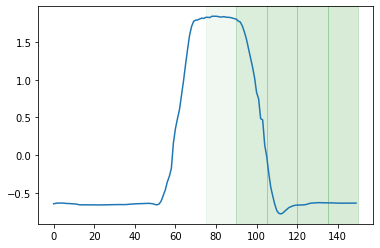

In [ ]:
%matplotlib inline
leftist.plot_on_sample(explained_instance.flatten(),explanations)